# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [2]:
# insert code here

results['actual'].value_counts()

1.0    3000
0.0    2000
Name: actual, dtype: int64

**Insert comments here - From the above output, I can say that there is a imbalance of 1000 between two classes which means that 1 class has 1.5 times more values that 0 class which is imbalanced but not imbalanced extremely. The algorithm works pretty well on this data but it is required to consider imbalance while using classification algorithms such as logistic regression because there will be a bias towards the 1 class, by considering resampling of the data to improve the model performance.**

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

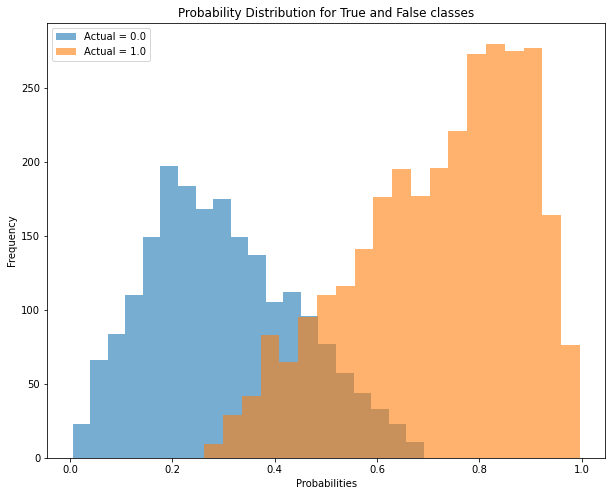

In [3]:
# insert code here

r = results.groupby('actual')

# Create a histogram for each class
plt.figure(figsize=(10, 8))

for label, group in r:
    plt.hist(group['prob'], bins=20, alpha=0.6, label=f'Actual = {label}')

# Set title and labels of the graph
plt.xlabel('Probabilities')
plt.ylabel('Frequency')
plt.title('Probability Distribution for True and False classes')

# Plot the legend
plt.legend()

# Show the plot
plt.show()


**Insert comments here - From the plot, it is clear that it is to visualize the distribution of True or False classes. There is a high value for 1.0 class which means that there is a high confidence in 1.0 class more than 0.0 class. Here, the distributions also overlap, which can be explained as the model can be complicated while classifying.**

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [4]:
# insert code here

from sklearn.metrics import confusion_matrix

# Initialise the threshold value to 0.5
threshold = 0.5

# Create preddictions for the probabilities more than the threshold and convert them into integer.
predicted = (results['prob'] >= threshold).astype(int)

# Find the confusion matrix of actual and predicted
cm = confusion_matrix(results['actual'], predicted)

# Print the confusion matrix
print("Confusion Matrix")
print(cm)


Confusion Matrix
[[1790  210]
 [ 377 2623]]


**Insert comments here - In the above code, I have set the threshold value and predicted values based on threshold, then created the confusion matrix for the predicted and actual, and then print the confusion matrix. In confusion matrix, true positive and true negative values are high which means that the model predicted the values correctly and this model will fit the data.**

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [5]:
# insert code here

tp = cm[1, 1]  
tn = cm[0, 0]  
fp = cm[0, 1]  
fn = cm[1, 0] 

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Precision
precision = tp / (tp + fp)

# Recall
recall = tp / (tp + fn)

# Print the values
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.88
Precision: 0.93
Recall: 0.87


**Insert comments here - From the above output, I will select the accuracy, because it assess overall correctness of predictions while precision is a measure of correctly predicted positive instances and recall is a measure of correctly identified true positives. It is clear that both of these stick to only one class but accuracy finds the overall correctness of predictions.**

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

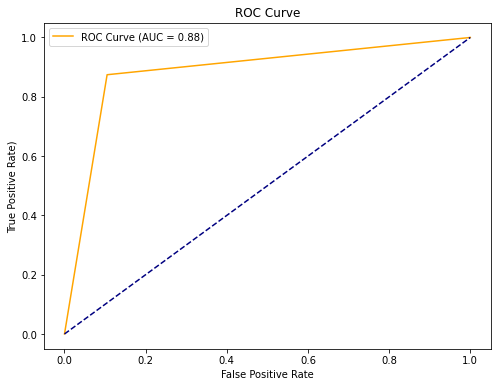

In [6]:
# Insert code here

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicted probabilities
fpr, tpr, thresholds = roc_curve(results['actual'], predicted)

# Calculate the ROC_AUC Score
roc_auc = roc_auc_score(results['actual'], predicted)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate)')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Insert comments here - In this ROC curve plot, the curve is closer to Y-axis and it is forming an right angle which can be concluded as the better model for this data.**